In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
# fix random seed for reproducibility
tf.random.set_seed(7)

110


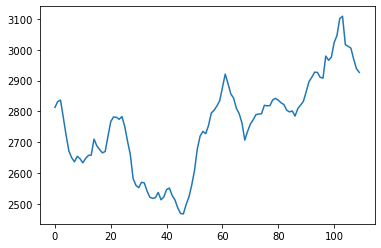

In [3]:
# Use a random dataset for testing
import pandas as pd
import matplotlib.pyplot as plt
dataframe = pd.read_csv('timeseries0.csv', usecols=[2], engine='python')
dataframe = dataframe.rolling(min_periods=1, window=7).mean().values
dataframe = pd.DataFrame(dataframe)
# dataframe = dataframe.iloc[:55]
print(dataframe.shape[0])
plt.plot(dataframe)
plt.show()

In [4]:
# Change the dataset format to float
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

82 28


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# print(trainX)

# for i in range(trainX.shape[0]):
#     print(i, trainX[i, 0], trainY[i])

In [8]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
80/80 - 3s - loss: 0.1204 - 3s/epoch - 32ms/step
Epoch 2/100
80/80 - 0s - loss: 0.0562 - 157ms/epoch - 2ms/step
Epoch 3/100
80/80 - 0s - loss: 0.0301 - 150ms/epoch - 2ms/step
Epoch 4/100
80/80 - 0s - loss: 0.0236 - 151ms/epoch - 2ms/step
Epoch 5/100
80/80 - 0s - loss: 0.0212 - 154ms/epoch - 2ms/step
Epoch 6/100
80/80 - 0s - loss: 0.0193 - 150ms/epoch - 2ms/step
Epoch 7/100
80/80 - 0s - loss: 0.0177 - 150ms/epoch - 2ms/step
Epoch 8/100
80/80 - 0s - loss: 0.0159 - 153ms/epoch - 2ms/step
Epoch 9/100
80/80 - 0s - loss: 0.0144 - 150ms/epoch - 2ms/step
Epoch 10/100
80/80 - 0s - loss: 0.0127 - 159ms/epoch - 2ms/step
Epoch 11/100
80/80 - 0s - loss: 0.0111 - 179ms/epoch - 2ms/step
Epoch 12/100
80/80 - 0s - loss: 0.0098 - 162ms/epoch - 2ms/step
Epoch 13/100
80/80 - 0s - loss: 0.0085 - 169ms/epoch - 2ms/step
Epoch 14/100
80/80 - 0s - loss: 0.0072 - 160ms/epoch - 2ms/step
Epoch 15/100
80/80 - 0s - loss: 0.0062 - 154ms/epoch - 2ms/step
Epoch 16/100
80/80 - 0s - loss: 0.0054 - 140ms/epoc

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
print(trainY)
print(trainPredict)
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 23ms/step
[[2832.00000478 2836.6667079  2781.00010907 2723.00000568 2671.66688331
  2649.8572141  2636.42839414 2654.28554848 2646.42855969 2633.14294457
  2647.42854564 2657.28550635 2658.14289945 2710.14278111 2688.4285818
  2676.42844434 2665.57149768 2669.85723921 2719.28555356 2766.9999997
  2782.14268788 2781.00010907 2774.42859794 2783.42847154 2751.71441267
  2703.71447483 2660.14287136 2582.14274286 2560.2856447  2552.42850291
  2569.8571137  2568.14293949 2541.42850441 2521.57153115 2517.71433318
  2520.2855945  2537.00001703 2513.14279396 2522.28571941 2546.42843418
  2551.28561811 2527.00000448 2512.42845271 2486.71430958 2468.71440938
  2467.28557388 2498.14285164 2522.42846526 2560.99998596 2609.0000768
  2678.28551741 2719.85714896 2735.00014314 2727.8570366  2753.99987629
  2794.71442074 2803.71429434 2817.71440371 2834.14287554 2878.14286957
  2921.14287763 2890.14270103 2856.85706081 2842.99985029 2809.71421007
  2792.57154998

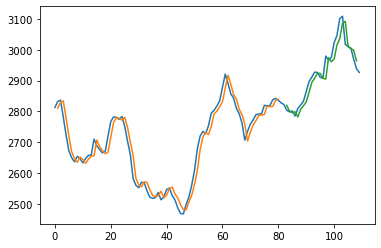

In [11]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [12]:
# from sklearn.linear_model import LinearRegression
# data = pd.read_csv('monkeypox_daily.csv')
# data = data[data['location'] == 'United States']
# data = data[data['date']<='2022-09-20']
# y=data['total_cases'].to_numpy()
# X=dataframe['Count'].to_numpy()
# X=np.cumsum(X)

# x_train, x_test = X[0:train_size], X[train_size:len(X)]
# y_train, y_test = y[0:train_size], y[train_size:len(y)]
# x_train = x_train.reshape(-1, 1)
# x_test = x_test.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)


In [13]:
# reg = LinearRegression().fit(x_train,y_train)
# testPredict[0][0]+=x_test[10]
# testPredict=np.cumsum(testPredict[:,0]).reshape(-1, 1)
# y_pred=reg.predict(testPredict)
# plt.scatter(testPredict, y_test[11:], color ='b')
# plt.plot(testPredict, y_pred, color ='k')
# plt.show()

In [14]:
data = pd.read_csv('monkeypox_daily.csv')
data = data[data['location'] == 'United States']
data = data[data['date']<='2022-09-20']
y=data['new_cases_smoothed'].to_numpy()
# X=dataframe[0].rolling(window=7,min_periods=1).mean().values
X=dataframe[0].to_numpy()

x_train, x_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

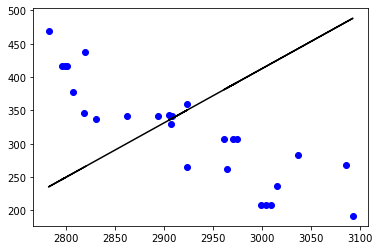

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)
testPredict=testPredict.reshape(-1, 1)
y_pred=reg.predict(testPredict)
plt.scatter(testPredict, y_test[(look_back+1):], color ='b')
plt.plot(testPredict, y_pred, color ='k')
plt.show()

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test[(look_back+1):],y_pred)

-2.9074809732696822

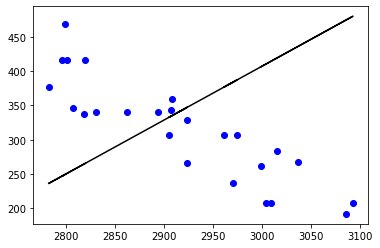

1
-2.969916302855113


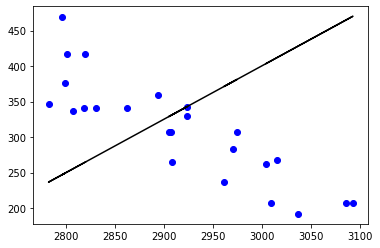

2
-2.8611335911450517


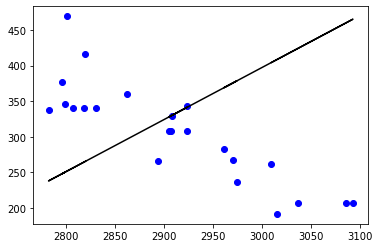

3
-2.8675486203719847


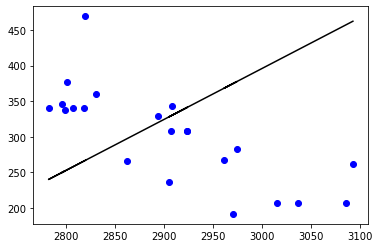

4
-2.750462565148313


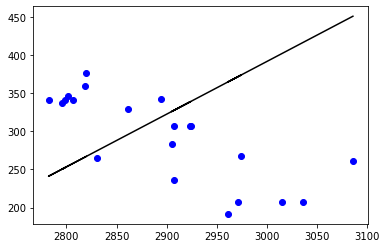

5
-2.989100407632278


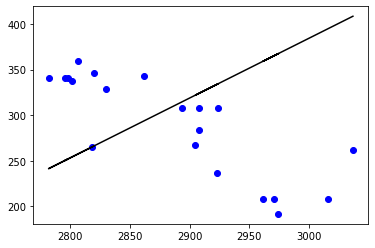

6
-2.5405901876837977


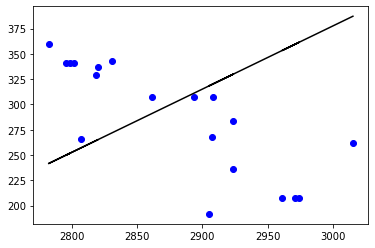

7
-2.033965504267521


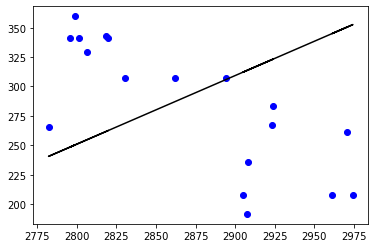

8
-1.5666697540024264


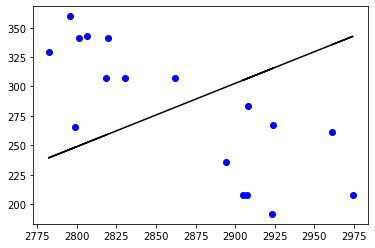

9
-1.3534005313929174


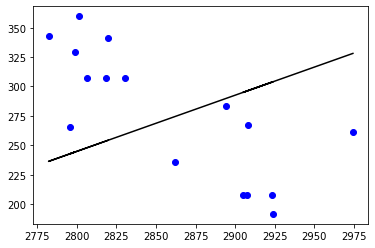

10
-1.069543633640928


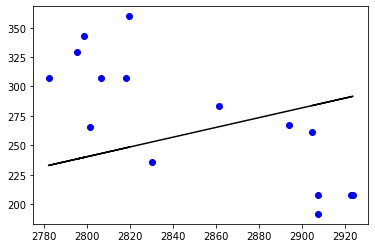

11
-0.865450438217972


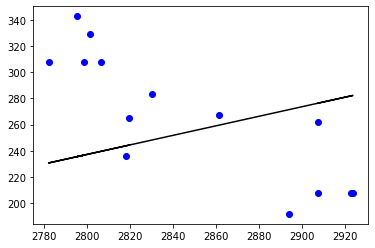

12
-0.8613306228905053


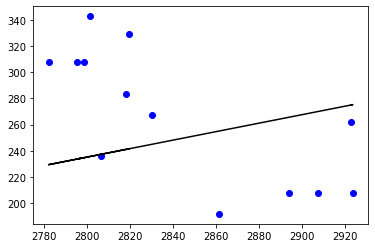

13
-0.6978107625439707


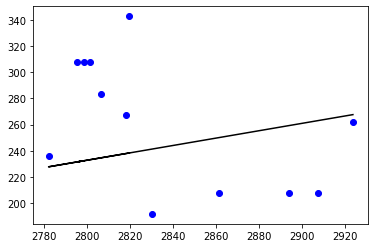

14
-0.4892682418946317


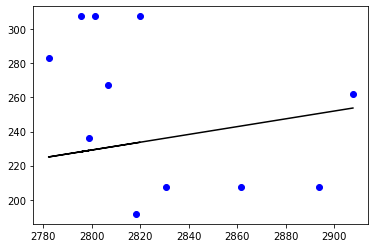

15
-0.3938677882631263


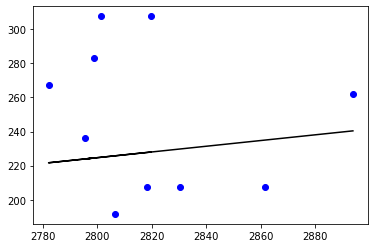

16
-0.2931397010596202


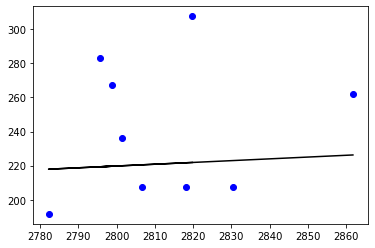

17
-0.256648431007636


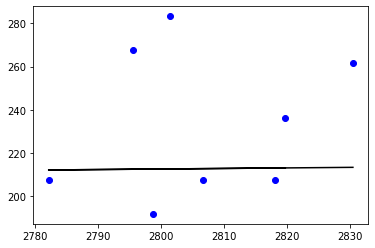

18
-0.3935166981537517


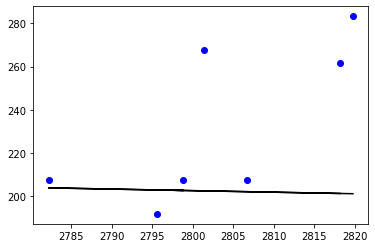

19
-0.8148295295662722


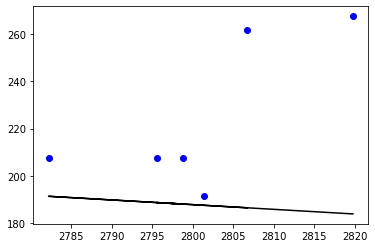

20
-1.642109300986585


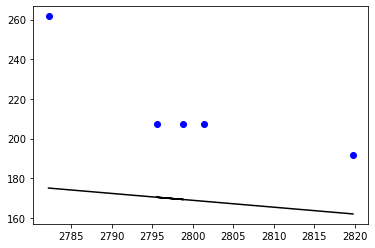

21
-3.43082888589257


In [17]:
for i in range(1,22):
    trainX=x_train[:(len(x_train)-i)]
    trainY=y_train[i:]
    reg = LinearRegression().fit(trainX,trainY)
    testPredict=testPredict.reshape(-1, 1)
    y_pred=reg.predict(testPredict[:(len(testPredict)-i)])
    plt.scatter(testPredict[:(len(testPredict)-i)], y_test[(look_back+1+i):], color ='b')
    plt.plot(testPredict[:(len(testPredict)-i)], y_pred, color ='k')
    plt.show()
    print(i)
    print(r2_score(y_test[(look_back+1+i):],y_pred))